<a href="https://colab.research.google.com/github/kmcdonnell2022/Statistics_McDonnell/blob/main/K_McDonnell_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture  
!pip install wandb #imports 
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data): #telling the program how to retrieve the data from the DataDeck and what to do with that data
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #this is a setup for a filter for convolutional

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1Khgee1PVtXmnEUoduc0AQPQvRe0Z4bvNbOUracFqLpI/edit#slide=id.g19ef9841cce_0_5" #link to the datadeck

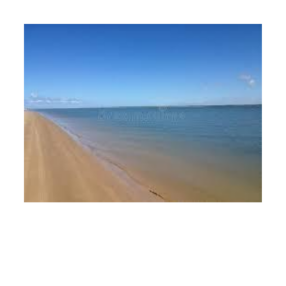

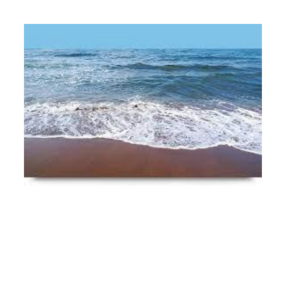

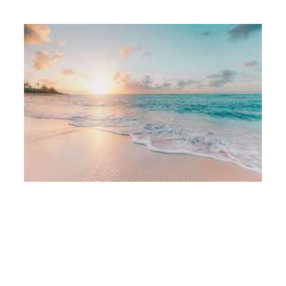

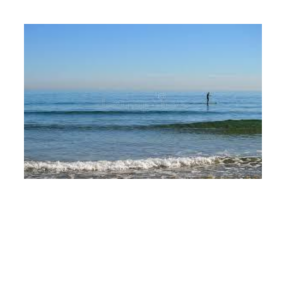

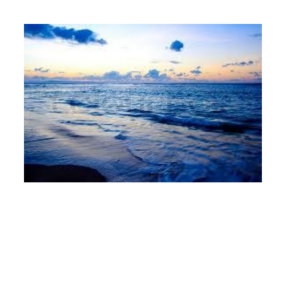

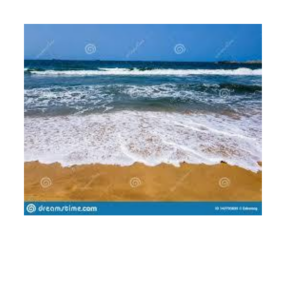

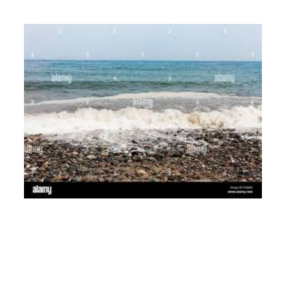

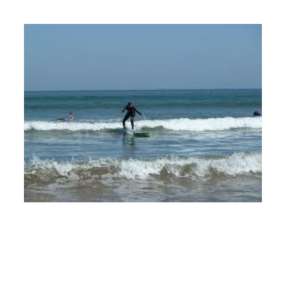

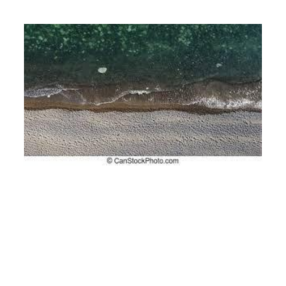

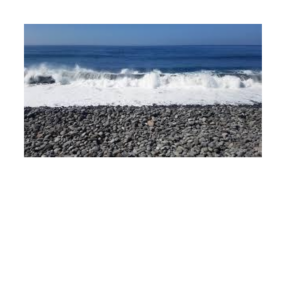

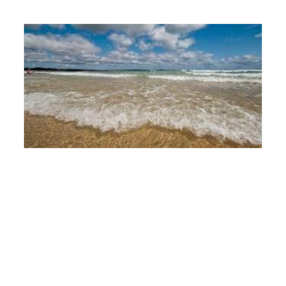

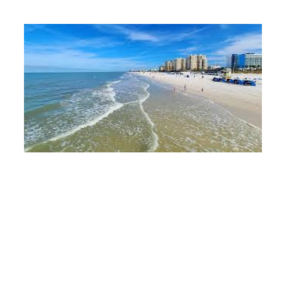

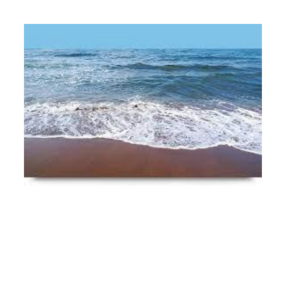

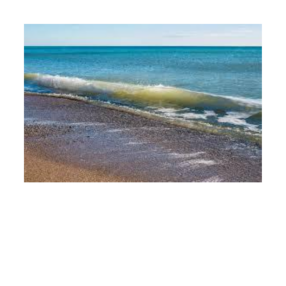

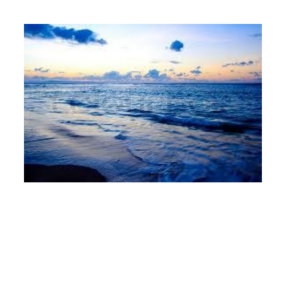

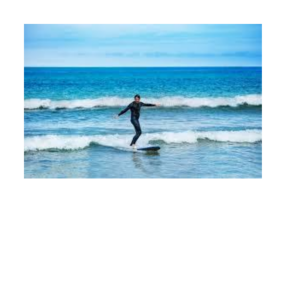

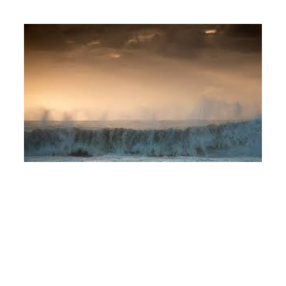

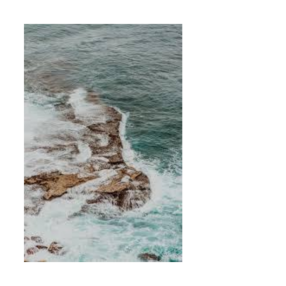

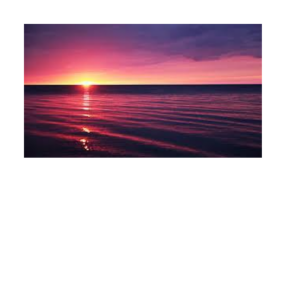

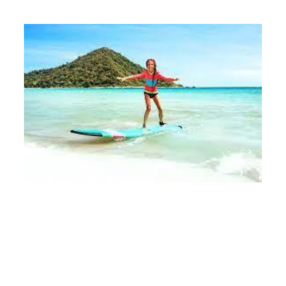

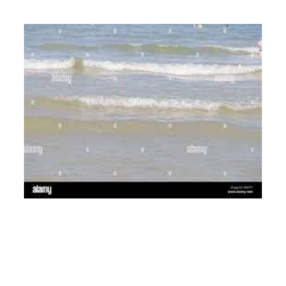

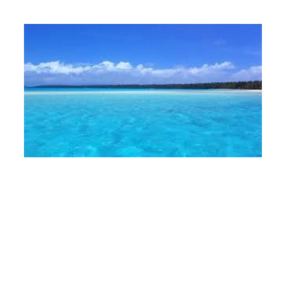

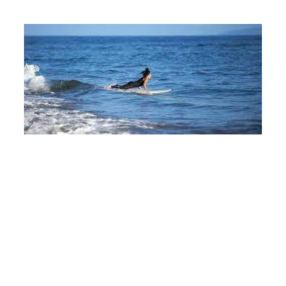

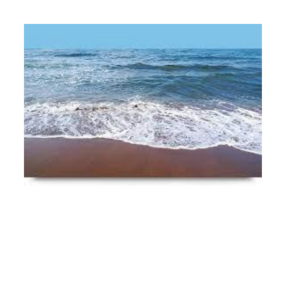

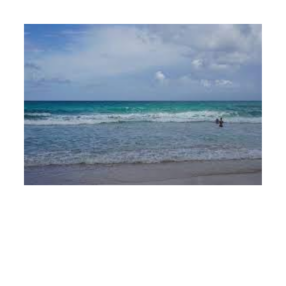

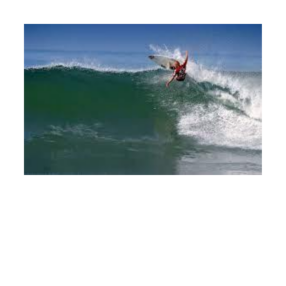

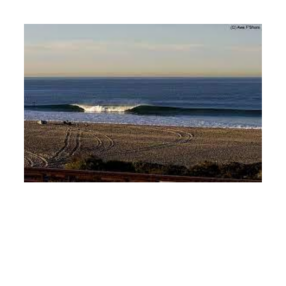

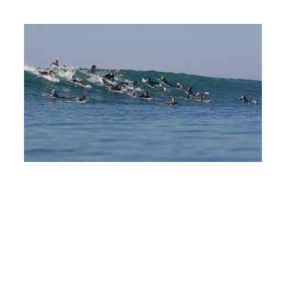

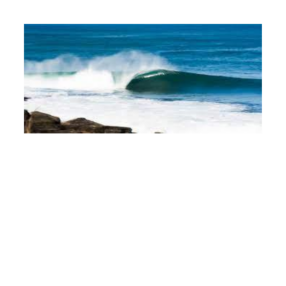

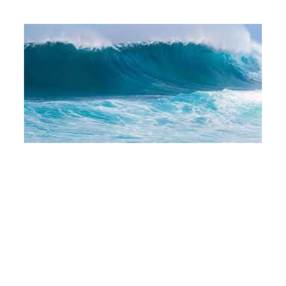

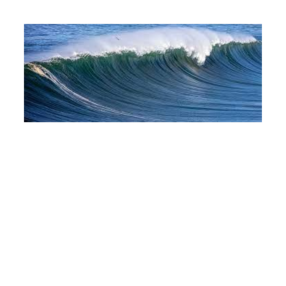

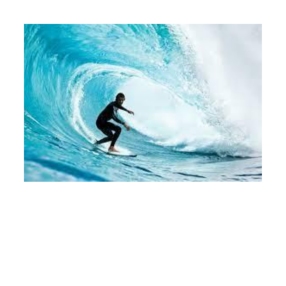

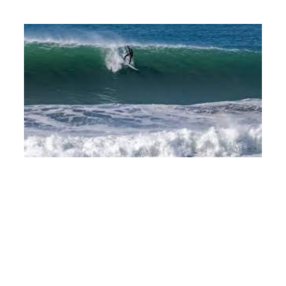

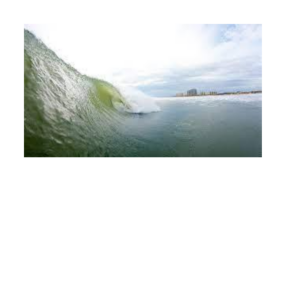

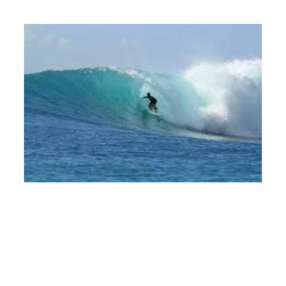

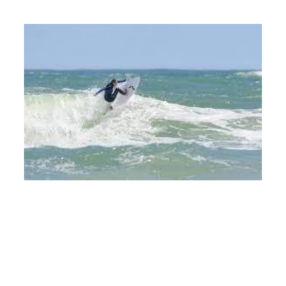

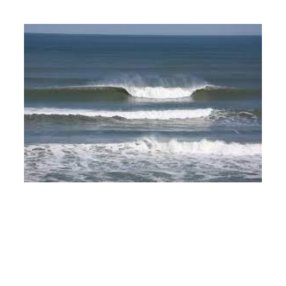

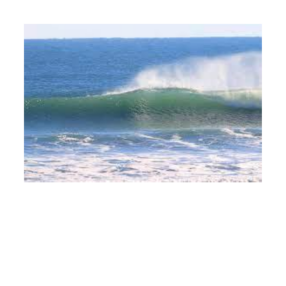

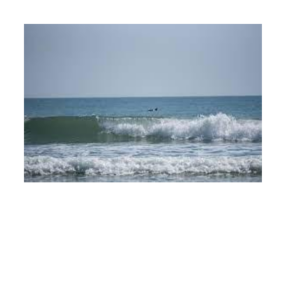

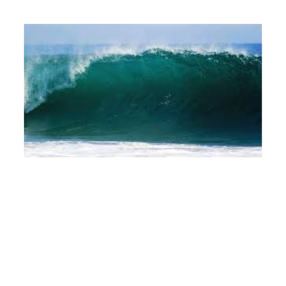

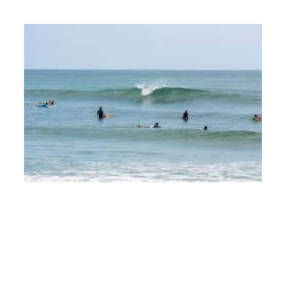

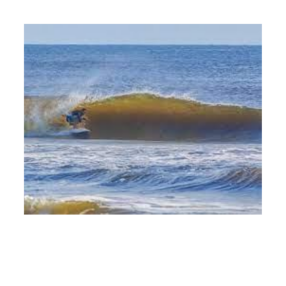

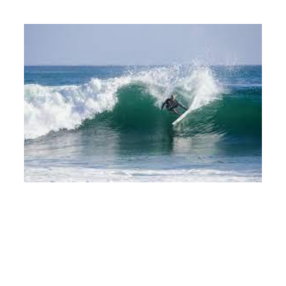

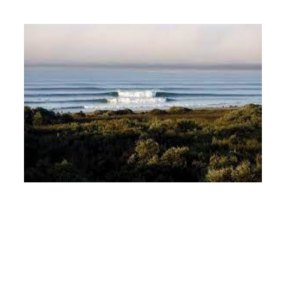

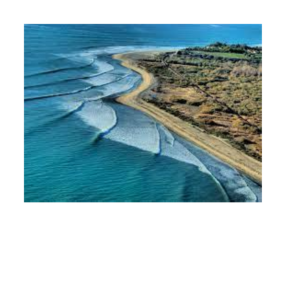

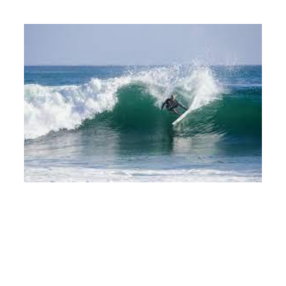

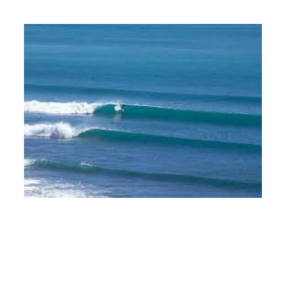

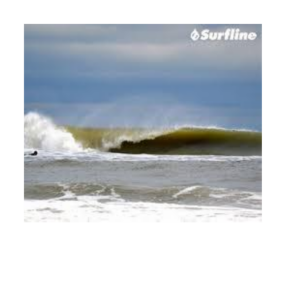

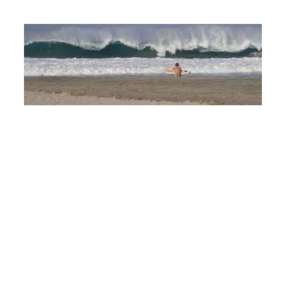

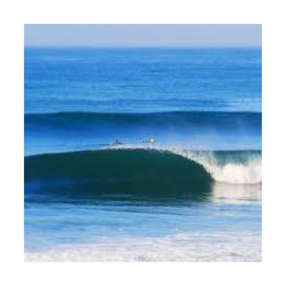

In [ ]:
images = [] #this tells the program how to display the data from the DataDeck

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape #shows the size of the images

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) 

tensor([[ 6.5093e-01, -1.1293e+00, -1.0649e+00,  ..., -4.9787e+00,
          1.7437e+00,  1.1289e+00],
        [ 5.6343e-01, -2.1276e+00,  7.6272e-01,  ..., -3.5093e+00,
          1.2442e-01,  3.5774e-01],
        [ 5.7177e-01,  2.9070e-01, -6.9431e-03,  ..., -6.2100e+00,
         -1.3621e+00,  9.3759e-01],
        ...,
        [ 1.8376e+00, -3.3562e+00, -5.6329e-01,  ..., -5.9985e+00,
          1.3925e-02,  1.7415e+00],
        [ 8.8905e-01, -1.2550e+00, -1.7821e+00,  ..., -4.6885e+00,
          1.7876e-01,  1.0409e+00],
        [ 4.6415e+00, -1.7212e+00,  4.9705e+00,  ..., -5.1593e+00,
         -1.0797e+00,  4.2737e-04]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) #lays out the data for the y axis 

In [ ]:
y.shape #shows the dimensions of the data 

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses): #this is what the computer believes 
    print(labels[i])

seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
rule, ruler
web site, website, internet site, site
sandbar, sand bar
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
cleaver, meat cleaver, chopper
seashore, coast, seacoast, sea-coast
television, television system
sandbar, sand bar
web site, website, internet site, site
web site, website, internet site, site
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
speedboat
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coa

In [ ]:
Y = np.zeros(50,) #showing the zeros and where they will lie 
Y[25:] = 1

In [ ]:
Y #displays the array 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy()  

In [ ]:
X.shape #showing the size of the data 

(50, 1000)

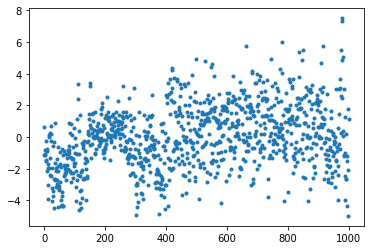

In [ ]:
plt.plot(X[0],'.') #graph

In [ ]:
X[0] #data displayed

array([ 6.50932550e-01, -1.12932277e+00, -1.06488609e+00, -1.10050416e+00,
       -8.19995165e-01, -2.66514361e-01, -1.47136116e+00, -1.50968838e+00,
       -7.63535380e-01, -8.52371752e-01, -2.12304831e+00, -3.02114105e+00,
       -1.70577681e+00, -1.95455110e+00, -3.92574596e+00,  1.63273215e-01,
       -1.57974642e-02, -1.95652640e+00,  2.53546894e-01, -2.38312387e+00,
       -1.30874014e+00,  7.00283349e-01,  2.12724686e-01, -2.41039127e-01,
       -2.46203065e+00, -4.06739569e+00, -3.19499588e+00, -1.97451341e+00,
       -3.41106033e+00, -5.86521268e-01, -3.69341874e+00, -2.65246010e+00,
       -4.44793940e+00, -3.26503932e-01,  8.67184699e-01, -2.62594557e+00,
       -1.64429927e+00, -2.72880387e+00, -2.14270210e+00, -1.95578444e+00,
       -3.17118287e+00, -2.95189381e+00, -2.71549201e+00, -1.39382064e+00,
       -6.14736140e-01, -4.39454603e+00, -1.85141945e+00, -2.14185739e+00,
       -3.34141421e+00, -3.28447890e+00, -3.11958218e+00, -9.16430891e-01,
       -1.72429860e+00, -

In [ ]:
np.argmax(X[0]) #returns the max element of the array in a particular axis

978

In [ ]:
labels[948] 

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] #finds the 10 best guesses

In [ ]:
for i in top_ten: #shows the 10 best guesses 
    print(labels[i])

seashore, coast, seacoast, sea-coast
sandbar, sand bar
screen, CRT screen
monitor
web site, website, internet site, site
television, television system
lakeside, lakeshore
sunscreen, sunblock, sun blocker
volcano
projectile, missile


In [ ]:
labels #all possible categories the program understands

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 33.,  80., 157., 238., 227., 164.,  72.,  20.,   7.,   2.]),
 array([-4.97872   , -3.7300158 , -2.4813113 , -1.2326068 ,  0.01609774,
         1.2648022 ,  2.5135067 ,  3.762211  ,  5.0109158 ,  6.25962   ,
         7.5083246 ], dtype=float32),
 <a list of 10 Patch objects>)

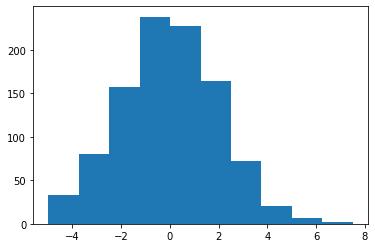

In [ ]:
plt.hist(X[0]) #histogram of the data 

In [ ]:
X = GPU_data(X) #assigning values of x and y to gpu data from x and y 
Y = GPU_data(Y)

In [1]:
def softmax(x):  #sums the soft maxes together to return s2
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):           #more summations  
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #resizes the truncated normal random numbers 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): #size adjustments 
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape #displays size

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #retrieves data from the dataset 
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #groups the data together 

    return x@w[0] #matrix multiplication 

In [ ]:
def make_plots(): #this generates the plots of the data 
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #this analyzes the data and tries to learn what the data represents in images 
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▁▅▂▅▂▅▅▆▅▃▅▃▆▆▆▆▇▆▆▆█▇█▇▇▇█▆█▇█▇▇▆▇█▇▇▇▇
loss,█▄▇▄▇▄▄▃▄▆▄▆▃▃▃▃▂▃▃▃▁▂▁▂▂▂▁▃▁▂▁▂▂▃▂▁▂▂▂▂
acc_train,0.75
loss,0.56326


<ipython-input-47-a6a0e4dd400d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Run 1: Loss: 0.657
       Train: 0.625
Run 2: Loss: 0.6883
       Train: 0.6563
Run 3: Loss: 0.5633
       Train: 0.7188

Avg Loss: 0.688
Avg Train: 0.6667